## K-Means Clustering
___

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import linear_sum_assignment

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# from em_el.utils import euclidean
# from em_el.cluster import KMeans

Shape of X: (120, 2)


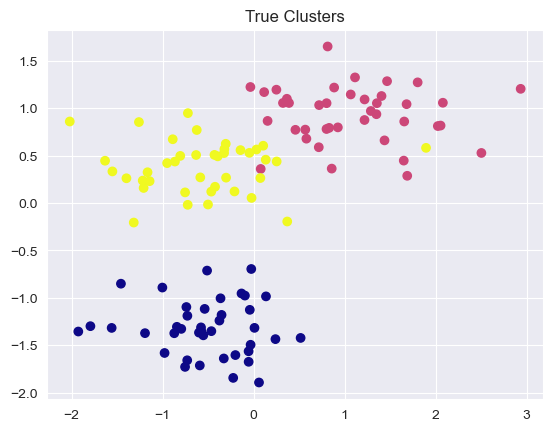

In [48]:
X, y = make_blobs(n_samples=120, centers=3, n_features=2, random_state=2)
print(f"Shape of X: {X.shape}")

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title("True Clusters")
plt.show()

In [13]:
class KMeans:
    """
    A simple implementation of the KMeans clustering algorithm from scratch.

    Parameters:
    n_clusters (int): The number of clusters to form.
    max_iters (int): The maximum number of iterations to perform.
    tol (float): The tolerance for convergence.

    Attributes:
    centroids (ndarray): The coordinates of the cluster centers.
    labels (ndarray): The labels of each point.
    """

    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        """
        Fit the KMeans algorithm to the data.

        Parameters:
        X (ndarray): The input data, shape (n_samples, n_features).

        Returns:
        self: The fitted KMeans instance.
        """
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for i in range(self.max_iters):
            # Assign labels based on closest centroid
            self.labels = self._assign_labels(X)

            # Calculate new centroids from the means of the points in each cluster
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break

            self.centroids = new_centroids

        return self

    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters:
        X (ndarray): The input data, shape (n_samples, n_features).

        Returns:
        labels (ndarray): The predicted labels for each sample.
        """
        return self._assign_labels(X)

    def _assign_labels(self, X):
        """
        Assign labels to each sample based on the closest centroid.

        Parameters:
        X (ndarray): The input data, shape (n_samples, n_features).

        Returns:
        labels (ndarray): The labels for each sample.
        """
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def fit_predict(self, X):
        """
        Compute cluster centers and predict cluster index for each sample.

        Parameters:
        X (ndarray): The input data, shape (n_samples, n_features).

        Returns:
        labels (ndarray): The predicted labels for each sample.
        """
        self.fit(X)
        return self.labels

In [49]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(X)

In [50]:
def map_labels(y_true, y_pred):
    # Compute the confusion matrix
    confusion_matrix = np.zeros((len(np.unique(y_true)), len(np.unique(y_pred))))
    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1

    # Find the optimal permutation
    row_ind, col_ind = linear_sum_assignment(confusion_matrix, maximize=True)

    # Create a mapping from predicted labels to true labels
    label_mapping = {col_ind[i]: row_ind[i] for i in range(len(col_ind))}

    # Map the predicted labels
    y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

    return y_pred_mapped

# Map predicted labels to true labels
y_pred_mapped = map_labels(y, y_pred)

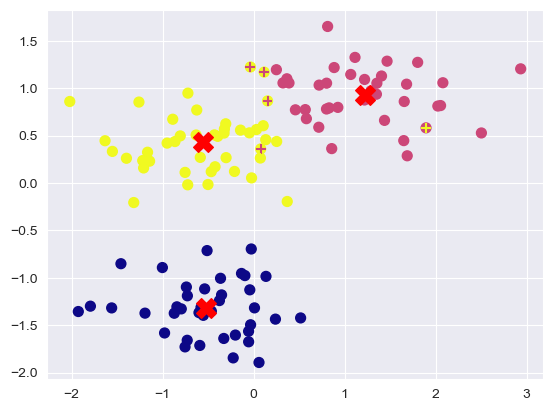

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mapped, s=50, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, marker='+', cmap='plasma')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=1, marker='X')
plt.show()

In [53]:
acc = accuracy_score(y, y_pred_mapped)
print("Accuracy: ", acc)

clf_rep = classification_report(y, y_pred_mapped)
print("Classification Report: \n", clf_rep)

Accuracy:  0.9583333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.90      0.94        40
           2       0.91      0.97      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



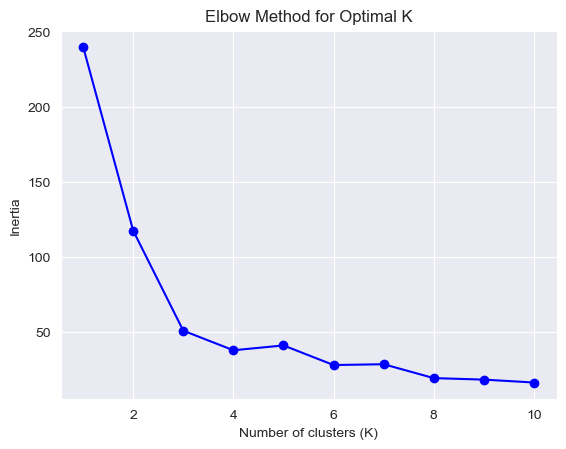

In [54]:
# Function to calculate inertia
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(X)):
        centroid = centroids[labels[i]]
        inertia += np.sum((X[i] - centroid) ** 2)
    return inertia

# Elbow method to determine the optimal number of clusters
def elbow_method(X, max_k=10):
    inertia_values = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        inertia = calculate_inertia(X, labels, kmeans.centroids)
        inertia_values.append(inertia)

    # Plot the inertia values
    plt.plot(k_values, inertia_values, 'bo-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Run the elbow method
elbow_method(X, max_k=10)

Here, the elbow method would suggest that the ideal K is 3, which aligns with how make_blobs created the dataset.